<a href="https://colab.research.google.com/github/Lenny-DarkMatter/AMoDA/blob/main/term_paper/tensorflow/rrlyrae_tf_term_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 32.9 MB/s 


# Starting with a Copy+Paste of the example from AstroML


downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/main/datasets/stripe82calibStars_v2.6.dat.gz to /root/astroML_data

uncompressing file...


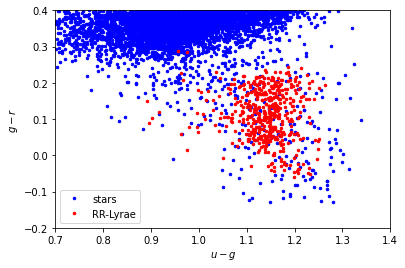

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_combined

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

#------------------------------------------------------------
# plot the results
ax = plt.axes()

ax.plot(X[stars, 0], X[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(X[rrlyrae, 0], X[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')

ax.legend(loc=3)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.set_xlim(0.7, 1.4)
ax.set_ylim(-0.2, 0.4)

plt.show()

# Exercise 1

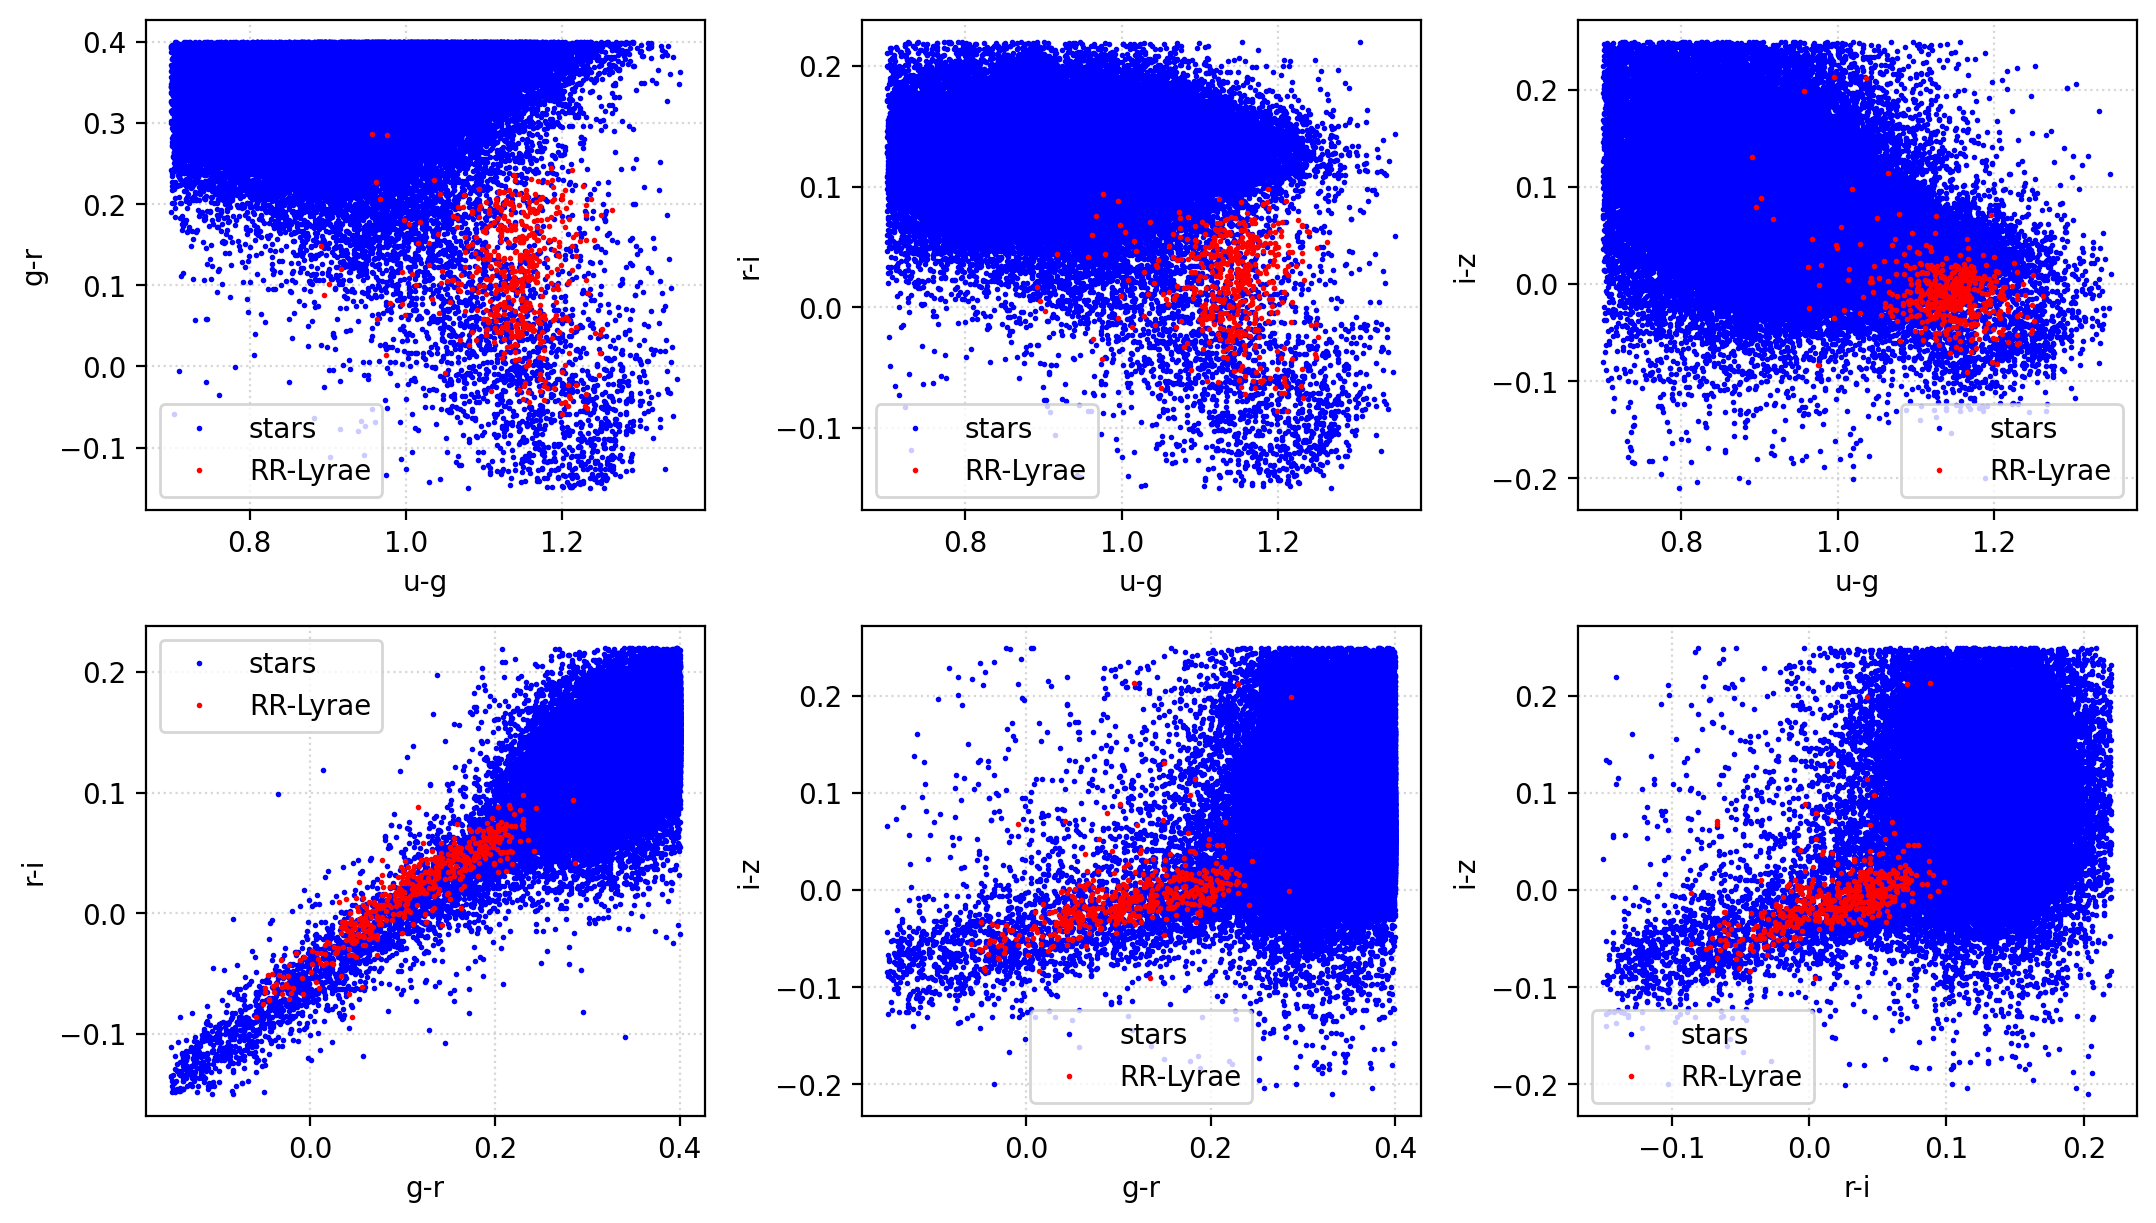

In [10]:
# names of the features, i. e. color magnitudes
features = "u-g g-r r-i i-z".split()

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()

stars = (y == 0)
rrlyrae = (y == 1)

# make six subplots
fig, axes = plt.subplots(2, 3, 
                         figsize=(32/3,6), 
                         dpi=200, 
                        #  sharex="col", 
                        #  sharey="row"
                         constrained_layout=True)

axes = axes.flatten() # 1D array

# # set the spacing between subplots
# plt.subplots_adjust(wspace=0.2, 
#                     hspace=0.2)

ax_cnt = 0

for i in range(len(features)):
  for j in range(i+1, len(features)):
    ax = axes[ax_cnt]
    ax.plot(X[stars, i], X[stars, j], '.', ms=2, c='b', label='stars')
    ax.plot(X[rrlyrae, i], X[rrlyrae, j], '.', ms=2, c='r', label='RR-Lyrae')

    ax.set_xlabel(features[i])
    ax.set_ylabel(features[j])

    ax.grid(alpha=.5, linestyle=":")
    ax.legend(loc="best")

    ax_cnt += 1